<a href="https://colab.research.google.com/github/TTNguyen0312/ALISE-AI-Library-Search/blob/main/version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

In [2]:
data = np.load('dataset_dev_3000.npz')
X = data['X']   # Input images
y = data['y']   # Multi-target labels

# 2. Decompose Targets for Analysis
# y[:, 0]: Target A (Classification 0-9)
# y[:, 1]: Target B (Classification 0-31)
# y[:, 2]: Target C (Regression 0-1)
y_target_A = y[:, 0].astype(int)
y_target_B = y[:, 1].astype(int)
y_target_C = y[:, 2]

print("Data Loaded Successfully")
print(f"X Shape: {X.shape} | Type: {X.dtype}")
print(f"y Shape: {y.shape} | Type: {y.dtype}")
print("-" * 30)
print(f"Target A (Class 10): Unique values: {np.unique(y_target_A)}")
print(f"Target B (Class 32): Unique values count: {len(np.unique(y_target_B))}")
print(f"Target C (Regress):  Range [{y_target_C.min():.4f}, {y_target_C.max():.4f}]")

Data Loaded Successfully
X Shape: (3000, 32, 32) | Type: float32
y Shape: (3000, 3) | Type: float32
------------------------------
Target A (Class 10): Unique values: [0 1 2 3 4 5 6 7 8 9]
Target B (Class 32): Unique values count: 32
Target C (Regress):  Range [0.0003, 0.9996]


In [3]:
# Check Pixel Intensity Statistics
print(" Pixel Value Statistics:")
print(f"Min : {X.min()}")
print(f"Max : {X.max()}")
print(f"Mean: {X.mean():.2f}")
print(f"Std : {X.std():.2f}")

# Check for Channel Dimension
if X.ndim == 3:
    print("Insight: Images are Rank-3 (N, H, W). Need to expand dims to (N, H, W, 1) for CNN.")
else:
    print("Images already have channel dimension.")

 Pixel Value Statistics:
Min : 5.5413776863133535e-05
Max : 6.8485941886901855
Mean: 0.81
Std : 0.74
Insight: Images are Rank-3 (N, H, W). Need to expand dims to (N, H, W, 1) for CNN.


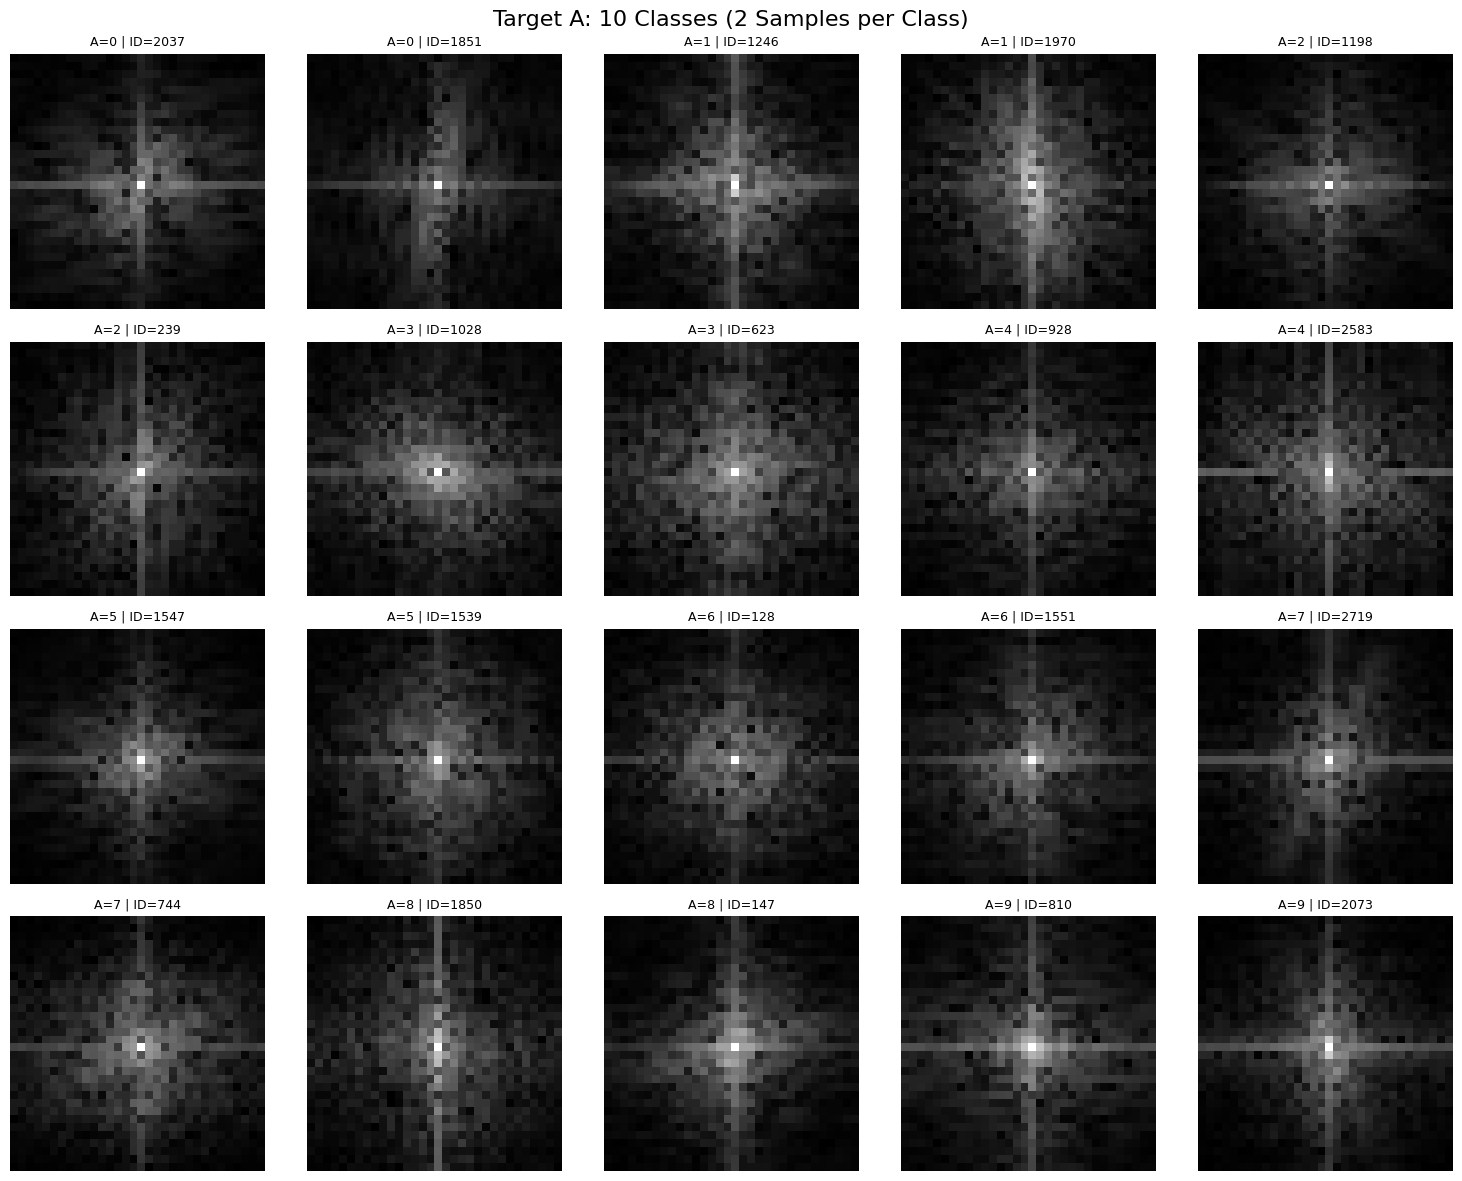

In [4]:
# Visualize random samples with their 3 labels
# -------- FIGURE 1: Target A --------
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

plot_idx = 0
for cls in range(10):
    cls_indices = np.where(y_target_A == cls)[0]
    chosen = np.random.choice(cls_indices, 2, replace=False)

    for idx in chosen:
        ax = axes[plot_idx]
        ax.imshow(X[idx], cmap='gray')
        ax.set_title(f"A={cls} | ID={idx}", fontsize=9)
        ax.axis('off')
        plot_idx += 1

fig.suptitle("Target A: 10 Classes (2 Samples per Class)", fontsize=16)
plt.tight_layout()
plt.show()

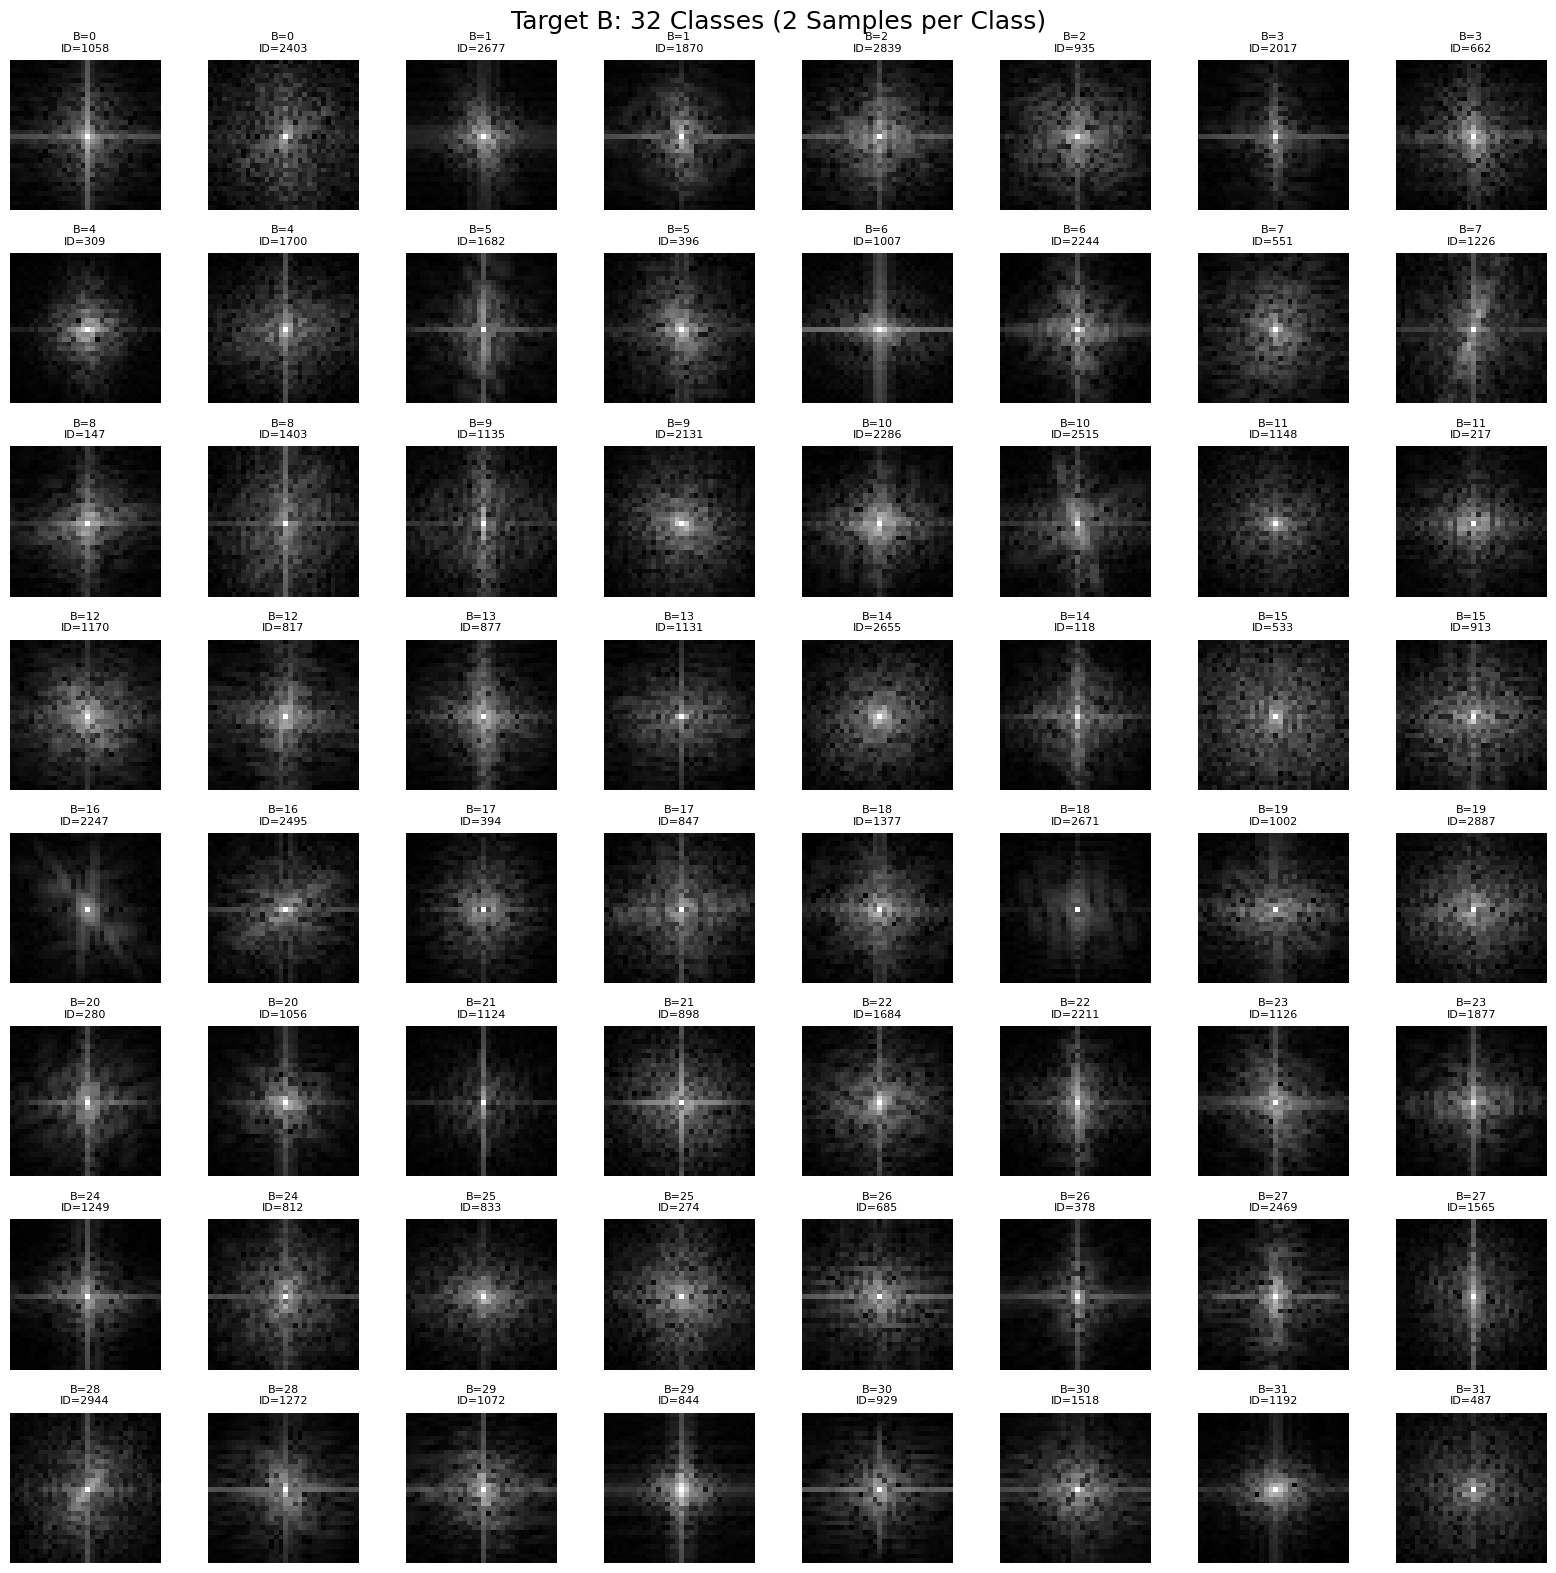

In [5]:
# -------- FIGURE 2: Target B --------
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

plot_idx = 0
for cls in range(32):
    cls_indices = np.where(y_target_B == cls)[0]
    chosen = np.random.choice(cls_indices, 2, replace=False)

    for idx in chosen:
        ax = axes[plot_idx]
        ax.imshow(X[idx], cmap='gray')
        ax.set_title(f"B={cls}\nID={idx}", fontsize=8)
        ax.axis('off')
        plot_idx += 1

fig.suptitle("Target B: 32 Classes (2 Samples per Class)", fontsize=18)
plt.tight_layout()
plt.show()

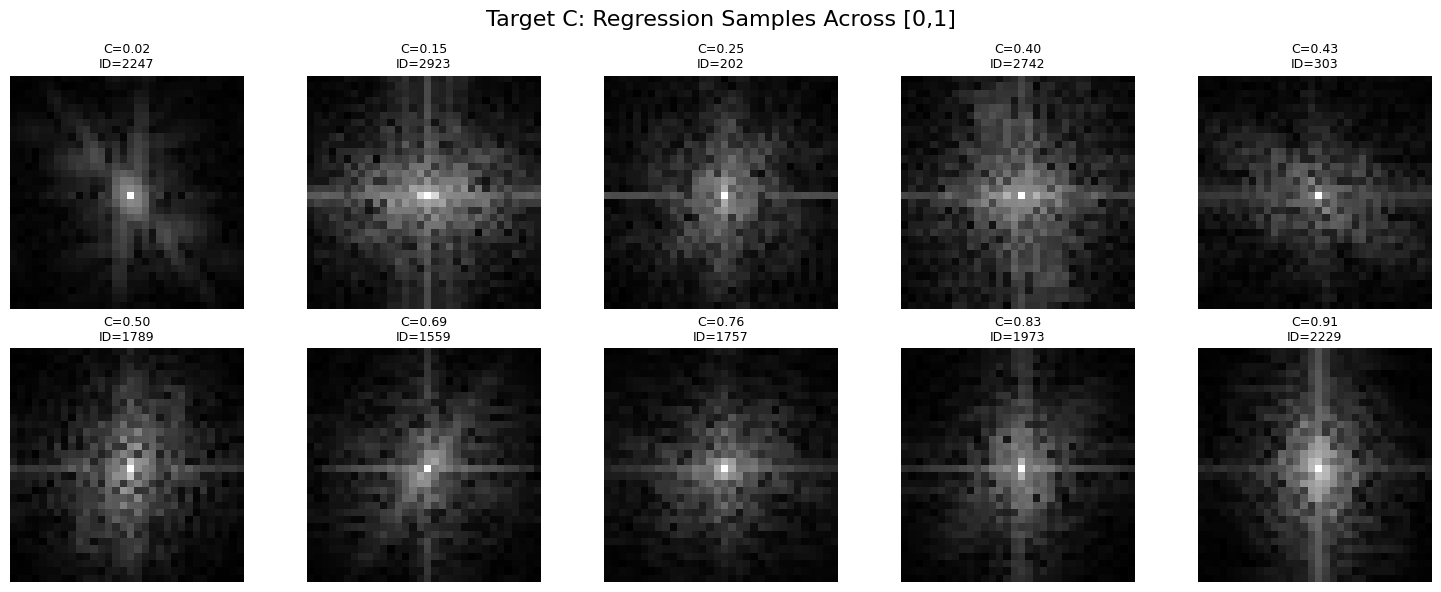

In [6]:
# -------- FIGURE 3: Target C --------
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

bins = np.linspace(0, 1, 11)

selected_indices = []
for i in range(10):
    bin_indices = np.where(
        (y_target_C >= bins[i]) & (y_target_C < bins[i+1])
    )[0]
    if len(bin_indices) > 0:
        selected_indices.append(np.random.choice(bin_indices))

for ax, idx in zip(axes, selected_indices):
    ax.imshow(X[idx], cmap='gray')
    ax.set_title(f"C={y_target_C[idx]:.2f}\nID={idx}", fontsize=9)
    ax.axis('off')

fig.suptitle("Target C: Regression Samples Across [0,1]", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1890465473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_target_A, palette='viridis')


Target A Balance Check: {np.int64(0): np.int64(290), np.int64(1): np.int64(304), np.int64(2): np.int64(311), np.int64(3): np.int64(305), np.int64(4): np.int64(306), np.int64(5): np.int64(294), np.int64(6): np.int64(290), np.int64(7): np.int64(291), np.int64(8): np.int64(310), np.int64(9): np.int64(299)}


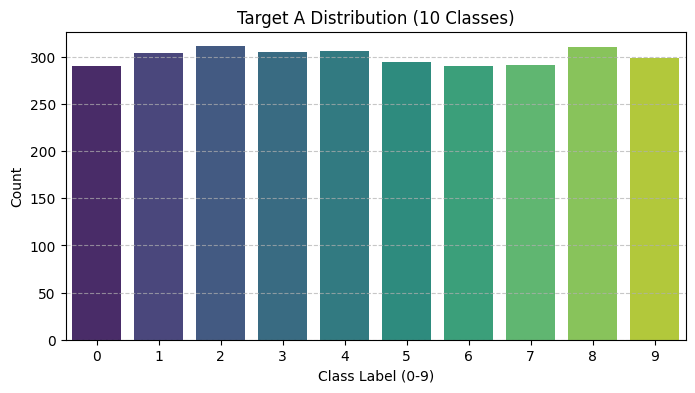

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_target_A, palette='viridis')
plt.title("Target A Distribution (10 Classes)")
plt.xlabel("Class Label (0-9)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Check exact counts
unique, counts = np.unique(y_target_A, return_counts=True)
print("Target A Balance Check:", dict(zip(unique, counts)))
plt.show()

/tmp/ipython-input-1059615394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_target_B, palette='magma')


Target B - Min samples per class: 75
Target B - Max samples per class: 113


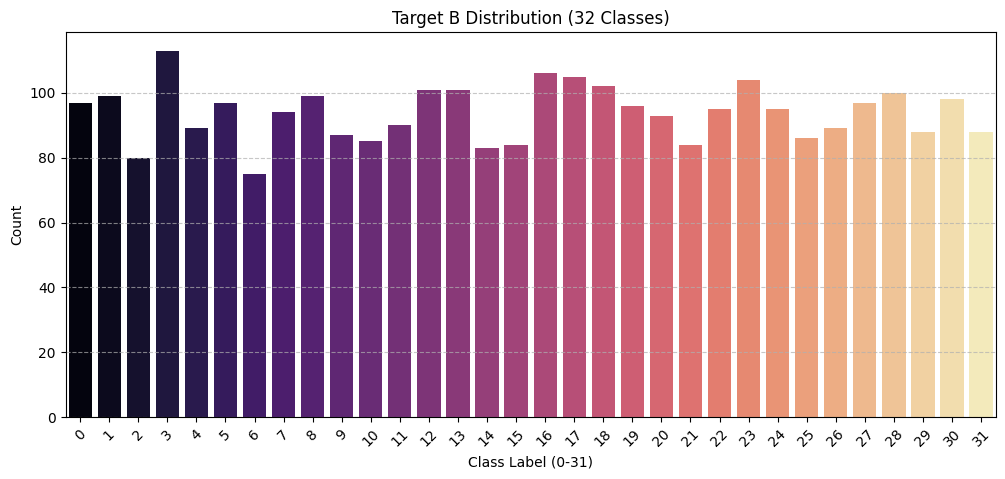

In [8]:
plt.figure(figsize=(12, 5))
sns.countplot(x=y_target_B, palette='magma')
plt.title("Target B Distribution (32 Classes)")
plt.xlabel("Class Label (0-31)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Statistics for Target B
unique_b, counts_b = np.unique(y_target_B, return_counts=True)
print(f"Target B - Min samples per class: {counts_b.min()}")
print(f"Target B - Max samples per class: {counts_b.max()}")
plt.show()

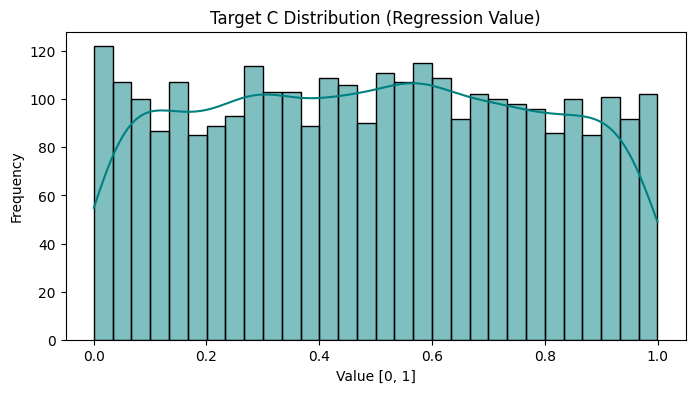

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(y_target_C, kde=True, bins=30, color='teal')
plt.title("Target C Distribution (Regression Value)")
plt.xlabel("Value [0, 1]")
plt.ylabel("Frequency")
plt.show()

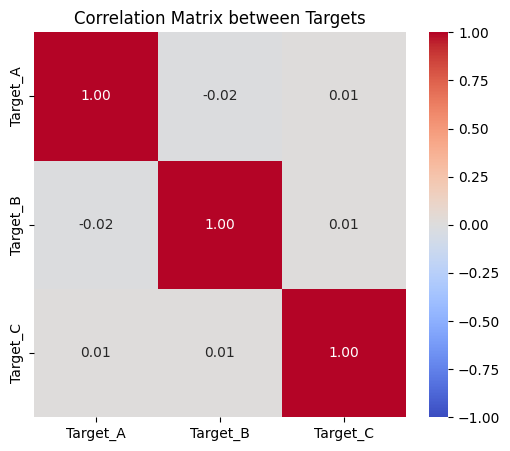

In [10]:
# Create a DataFrame for correlation checking
df_targets = pd.DataFrame({
    'Target_A': y_target_A,
    'Target_B': y_target_B,
    'Target_C': y_target_C
})

# Compute Correlation Matrix
corr_matrix = df_targets.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix between Targets")
plt.show()

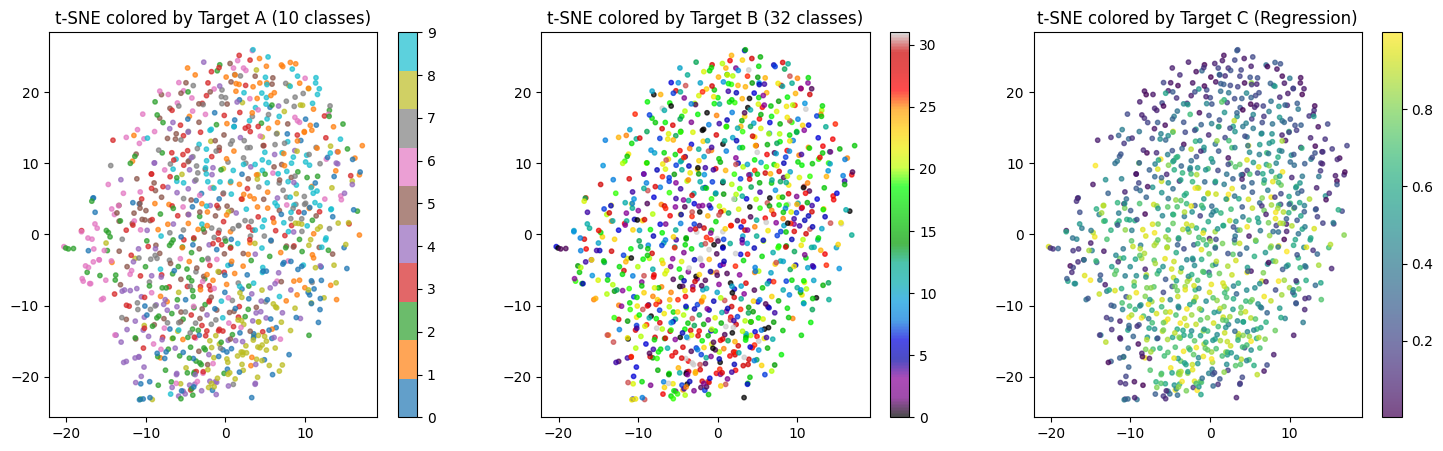

In [11]:
# Subsample for speed (1000 samples)
idx_subset = np.random.choice(len(X), 1000, replace=False)
X_tsne_input = X[idx_subset].reshape(1000, -1)
y_tsne_A = y_target_A[idx_subset]
y_tsne_B = y_target_B[idx_subset]
y_tsne_C = y_target_C[idx_subset]

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_embedded = tsne.fit_transform(X_tsne_input)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot colored by Target A
scatter1 = axes[0].scatter(X_embedded[:,0], X_embedded[:,1], c=y_tsne_A, cmap='tab10', s=10, alpha=0.7)
axes[0].set_title("t-SNE colored by Target A (10 classes)")
plt.colorbar(scatter1, ax=axes[0])

# Plot colored by Target B
scatter2 = axes[1].scatter(X_embedded[:,0], X_embedded[:,1], c=y_tsne_B, cmap='nipy_spectral', s=10, alpha=0.7)
axes[1].set_title("t-SNE colored by Target B (32 classes)")
plt.colorbar(scatter2, ax=axes[1])

# Plot colored by Target C
scatter3 = axes[2].scatter(X_embedded[:,0], X_embedded[:,1], c=y_tsne_C, cmap='viridis', s=10, alpha=0.7)
axes[2].set_title("t-SNE colored by Target C (Regression)")
plt.colorbar(scatter3, ax=axes[2])

plt.show()

In [12]:
from tensorflow.keras.utils import to_categorical

# 1. Normalize & Reshape
#  max value = 6.8485941886901855
MAX_PIXEL_VALUE = X.max()
X_norm = X.astype('float32') / MAX_PIXEL_VALUE
X_norm = np.expand_dims(X_norm, axis=-1) # (3000, 32, 32, 1)

# 2. Decompose Targets
y_A_raw = y[:, 0].astype(int)   # Class 0-9
y_B_raw = y[:, 1].astype(int)   # Class 0-31
y_C_raw = y[:, 2].astype(float) # Regression

# 3. Split Data (Train 70% - Val 15% - Test 15%)
from sklearn.model_selection import train_test_split

# Split 1: Train vs Temp
X_train, X_temp, yA_train, yA_temp, yB_train, yB_temp, yC_train, yC_temp = train_test_split(
    X_norm, y_A_raw, y_B_raw, y_C_raw,
    test_size=0.3, random_state=42, stratify=y_B_raw
)

# Split 2: Val vs Test
X_val, X_test, yA_val, yA_test, yB_val, yB_test, yC_val, yC_test = train_test_split(
    X_temp, yA_temp, yB_temp, yC_temp,
    test_size=0.5, random_state=42, stratify=yB_temp
)

# 4. Target Encoding
# Target A & B: One-hot Encoding
yA_train_cat = to_categorical(yA_train, num_classes=10)
yA_val_cat   = to_categorical(yA_val, num_classes=10)
yA_test_cat  = to_categorical(yA_test, num_classes=10)

yB_train_cat = to_categorical(yB_train, num_classes=32)
yB_val_cat   = to_categorical(yB_val, num_classes=32)
yB_test_cat  = to_categorical(yB_test, num_classes=32)

# Target C: Reshape to (N, 1) for Regression
yC_train_reg = yC_train.reshape(-1, 1)
yC_val_reg   = yC_val.reshape(-1, 1)
yC_test_reg  = yC_test.reshape(-1, 1)

print(f"Train Set: {X_train.shape}")
print(f"Val Set:   {X_val.shape}")
print(f"Test Set:  {X_test.shape}")

Train Set: (2100, 32, 32, 1)
Val Set:   (450, 32, 32, 1)
Test Set:  (450, 32, 32, 1)


In [13]:
# DATA AUGMENTATION & MULTI-OUTPUT GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. augmentation
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 2. Custom Generator Wrapper
def multi_output_data_generator(X, yA, yB, yC, batch_size):
    indices = np.arange(len(X))
    gen_X = datagen.flow(X, indices, batch_size=batch_size, shuffle=True)

    while True:
        X_batch, idx_batch = next(gen_X)

        yA_batch = yA[idx_batch]
        yB_batch = yB[idx_batch]
        yC_batch = yC[idx_batch]

        yield X_batch, {
            'output_A': yA_batch,
            'output_B': yB_batch,
            'output_C': yC_batch
        }

BATCH_SIZE = 32

train_gen = multi_output_data_generator(
    X_train, yA_train_cat, yB_train_cat, yC_train_reg,
    batch_size=BATCH_SIZE
)

val_gen = multi_output_data_generator(
    X_val, yA_val_cat, yB_val_cat, yC_val_reg,
    batch_size=BATCH_SIZE
)

In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_multitask_model(input_shape=(32, 32, 1)):
    # 1. SHARED BACKBONE (Feature Extractor)

    inputs = Input(shape=input_shape, name='input_image')

    # Block 1: Low-level features
    x = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x) # Output: 16x16

    # Block 2: Mid-level features
    x = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x) # Output: 8x8

    # Block 3: High-level features (Bottleneck)
    x = Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x) # Output: 4x4

    # Global Flatten
    shared_features = Flatten(name='shared_flatten')(x)
    shared_features = Dropout(0.4, name='shared_dropout')(shared_features)

    # 2. TASK-SPECIFIC BRANCHES (Heads)

    # --- Branch A: Classification (0-9) ---
    # (10 class)
    x_a = Dense(64, activation='relu')(shared_features)
    x_a = BatchNormalization()(x_a)
    x_a = Dropout(0.3)(x_a)
    output_a = Dense(10, activation='softmax', name='output_A')(x_a)

    # --- Branch B: Classification (0-31) ---
    # (32 class)
    x_b = Dense(128, activation='relu')(shared_features)
    x_b = BatchNormalization()(x_b)
    x_b = Dropout(0.3)(x_b)
    output_b = Dense(32, activation='softmax', name='output_B')(x_b)

    # --- Branch C: Regression (0-1) ---
    x_c = Dense(32, activation='relu')(shared_features)
    output_c = Dense(1, activation='sigmoid', name='output_C')(x_c)

    # 3. MODEL ASSEMBLY
    model = Model(inputs=inputs, outputs=[output_a, output_b, output_c], name='MultiTask_CNN')

    return model

model = build_multitask_model()
model.summary()

Model: "MultiTask_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        320 │ input_image[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_flatten      │ (None, 2048)      │          0 │ max_pooling2d_2[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dropout      │ (None, 2048)      │          0 │ shared_flatten[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    131,136 │ shared_dropout[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │    262,272 │ shared_dropout[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]     

 Total params: 558,123 (2.13 MB)

 Trainable params: 557,291 (2.13 MB)

 Non-trainable params: 832 (3.25 KB)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_multitask_cnn():
    """
    Multi-task CNN for:
    - Target A: 10-class classification
    - Target B: 32-class classification
    - Target C: regression in [0,1]
    """

    # Input: (32, 32, 1)
    inputs = layers.Input(shape=(32, 32, 1), name="input_image")

    # ---------- Shared Feature Extractor ----------
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    # ---------- Output Heads ----------
    # Target A: 10 classes
    out_a = layers.Dense(
        10,
        activation="softmax",
        name="output_A"
    )(x)

    # Target B: 32 classes
    out_b = layers.Dense(
        32,
        activation="softmax",
        name="output_B"
    )(x)

    # Target C: regression in [0,1]
    out_c = layers.Dense(
        1,
        activation="sigmoid",
        name="output_C"
    )(x)

    model = models.Model(
        inputs=inputs,
        outputs=[out_a, out_b, out_c],
        name="multitask_cnn"
    )

    return model


In [20]:
model = build_multitask_cnn()
model.summary()

Model: "multitask_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │        320 │ input_image[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_A (Dense)    │ (None, 10)        │      1,290 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_B (Dense)    │ (None, 32)        │      4,128 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_C (Dense)    │ (None, 1)         │        129 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 115,627 (451.67 KB)

 Trainable params: 115,179 (449.92 KB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
# LOSS_WEIGHTS = {
#     'output_A': 1.0,
#     'output_B': 1.0,
#     'output_C': 5.0  # Boost gradient for branch Regression
# }

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'output_A': 'categorical_crossentropy',
        'output_B': 'categorical_crossentropy',
        'output_C': 'mse' # Mean Squared Error
    },
    # loss_weights=LOSS_WEIGHTS,
    metrics={
        'output_A': 'accuracy',
        'output_B': 'accuracy',
        'output_C': 'mae' # Mean Absolute Error
    }
)

Starting Training (Multi-Task)...
Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - loss: 5.8342 - output_A_accuracy: 0.1650 - output_A_loss: 2.2655 - output_B_accuracy: 0.0309 - output_B_loss: 3.4986 - output_C_loss: 0.0702 - output_C_mae: 0.2226 - val_loss: 5.9824 - val_output_A_accuracy: 0.1005 - val_output_A_loss: 2.4178 - val_output_B_accuracy: 0.0431 - val_output_B_loss: 3.4888 - val_output_C_loss: 0.0970 - val_output_C_mae: 0.2612
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.6976 - output_A_accuracy: 0.2132 - output_A_loss: 2.1436 - output_B_accuracy: 0.0255 - output_B_loss: 3.4936 - output_C_loss: 0.0598 - output_C_mae: 0.2036 - val_loss: 7.0764 - val_output_A_accuracy: 0.0933 - val_output_A_loss: 3.3486 - val_output_B_accuracy: 0.0359 - val_output_B_loss: 3.5563 - val_output_C_loss: 0.1714 - val_output_C_mae: 0.3180
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.5867 - output_A_accuracy: 0.2583 - output_A_loss: 2.0638 - output_B_accuracy: 

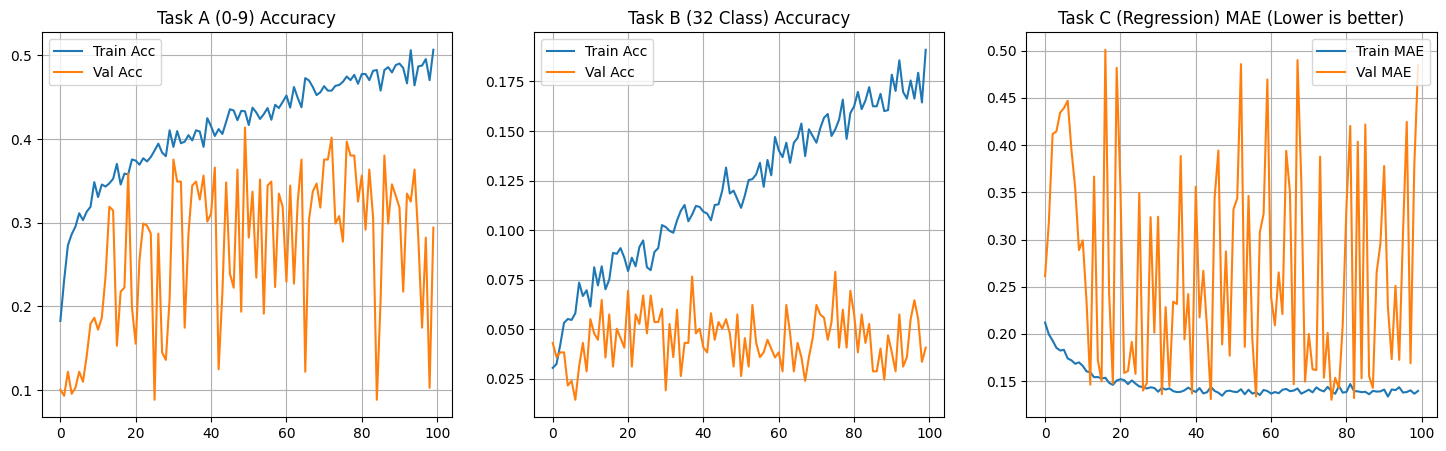

In [22]:
steps_per_epoch  = len(X_train) // BATCH_SIZE
validation_steps = len(X_val)   // BATCH_SIZE

print("Starting Training (Multi-Task)...")

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps,
    epochs=100,
    verbose=1
)

print("Training Complete!")

# VISUALIZE TRAINING HISTORY
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Accuracy - Task A
axes[0].plot(history.history['output_A_accuracy'], label='Train Acc')
axes[0].plot(history.history['val_output_A_accuracy'], label='Val Acc')
axes[0].set_title('Task A (0-9) Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot Accuracy - Task B
axes[1].plot(history.history['output_B_accuracy'], label='Train Acc')
axes[1].plot(history.history['val_output_B_accuracy'], label='Val Acc')
axes[1].set_title('Task B (32 Class) Accuracy')
axes[1].legend()
axes[1].grid(True)

# Plot MAE - Task C (Regression)
axes[2].plot(history.history['output_C_mae'], label='Train MAE')
axes[2].plot(history.history['val_output_C_mae'], label='Val MAE')
axes[2].set_title('Task C (Regression) MAE (Lower is better)')
axes[2].legend()
axes[2].grid(True)

plt.show()

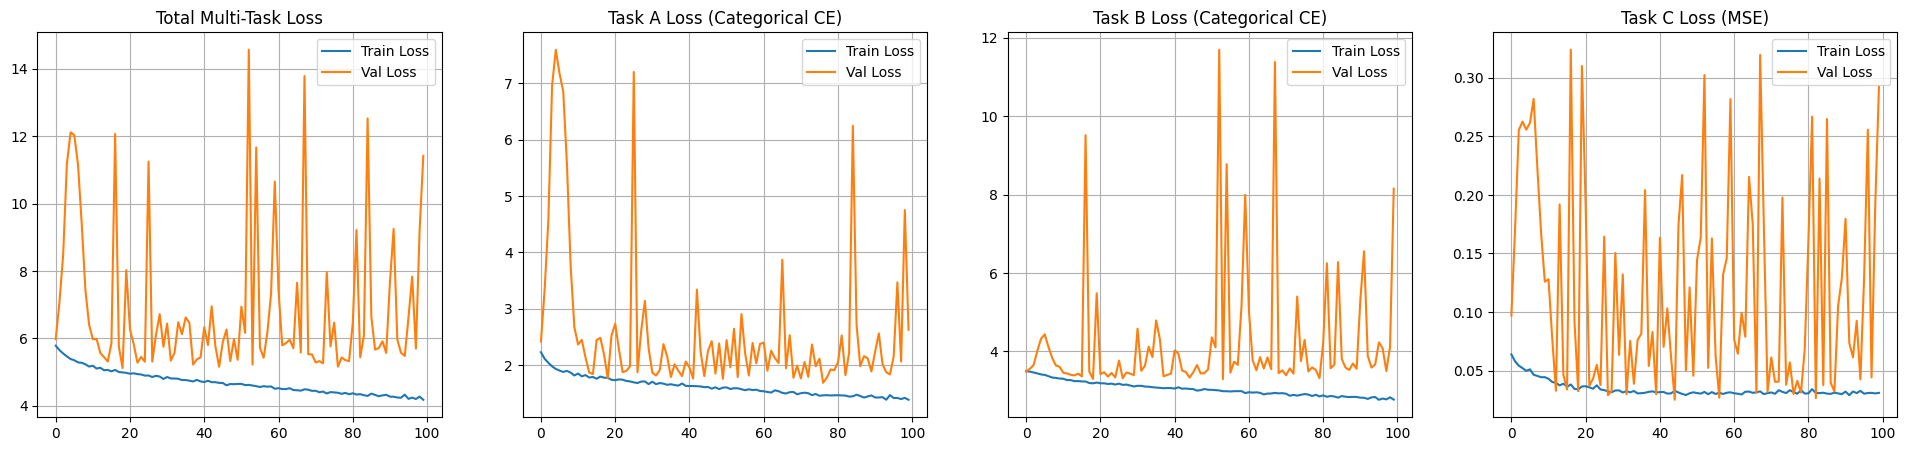

In [23]:
# VISUALIZE LOSSES
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# ---------- Total Loss ----------
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Total Multi-Task Loss')
axes[0].legend()
axes[0].grid(True)

# ---------- Task A Loss ----------
axes[1].plot(history.history['output_A_loss'], label='Train Loss')
axes[1].plot(history.history['val_output_A_loss'], label='Val Loss')
axes[1].set_title('Task A Loss (Categorical CE)')
axes[1].legend()
axes[1].grid(True)

# ---------- Task B Loss ----------
axes[2].plot(history.history['output_B_loss'], label='Train Loss')
axes[2].plot(history.history['val_output_B_loss'], label='Val Loss')
axes[2].set_title('Task B Loss (Categorical CE)')
axes[2].legend()
axes[2].grid(True)

# ---------- Task C Loss ----------
axes[3].plot(history.history['output_C_loss'], label='Train Loss')
axes[3].plot(history.history['val_output_C_loss'], label='Val Loss')
axes[3].set_title('Task C Loss (MSE)')
axes[3].legend()
axes[3].grid(True)

plt.show()